In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1: Import and Load Dataset**

We’ll mount Google Drive, check the dataset structure, and prepare the data for training.

**1️ Mount Google Drive and Define Paths**

In [2]:
import os

dataset_path = "/content/drive/My Drive/Computer_Vision_intern/Teeth_Dataset"

test_dir = os.path.join(dataset_path, "Testing")
train_dir = os.path.join(dataset_path, "Training")
val_dir = os.path.join(dataset_path, "Validation")

classes = os.listdir(dataset_path)
print("Classes:", classes)


Classes: ['Training', 'Testing', 'Validation']


# **Step 2: Preprocessing & Data Augmentation**
* Normalize images (scale pixel values).

* Apply augmentations (rotation, zoom, flips).

**2️ Load Images with Augmentation**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 256
batch_size = 32

# Data Augmentation & Normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load datasets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)


Found 3097 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1508 images belonging to 10 classes.


# **Step 3: Data Visualization**

* Show class distribution.

* Display sample images before & after augmentation.

**3️ Plot Class Distribution**

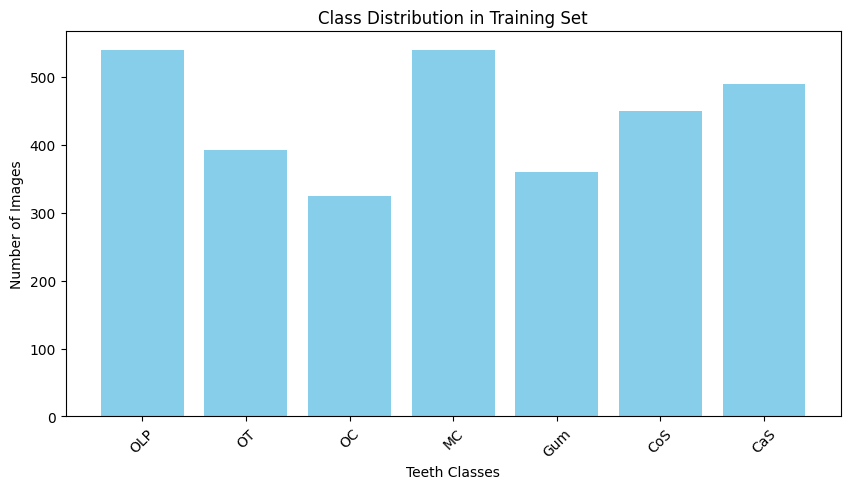

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

classes_in_training = os.listdir(train_dir)
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes_in_training}

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Teeth Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()


**4️ Display Sample Images**

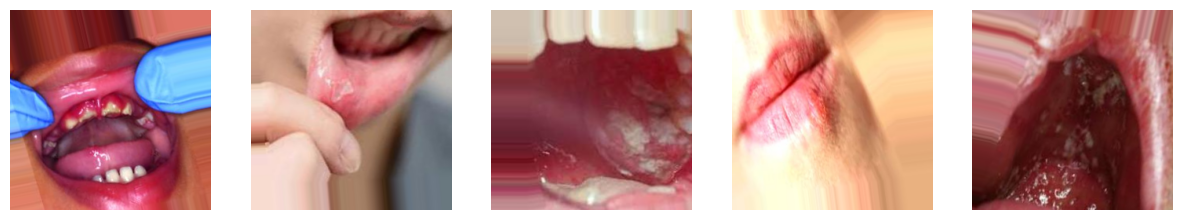

In [5]:
# Get a batch of images
sample_batch, sample_labels = next(train_generator)

# Display images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(sample_batch[i])
    axes[i].axis("off")
plt.show()


# **Step 4: Build the CNN Model**

* We will train a CNN from scratch as required.

**5️ Define Model Architecture**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# To get the number of classes from the train_generator
num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,879 (56.61 MB)

 Trainable params: 14,839,879 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Step 5: Train the Model**

**6️ Start Training**

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of training steps per epoch
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,  # Number of validation steps
    epochs=34
)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 629s 6s/step - accuracy: 0.2222 - loss: 1.9090 - val_accuracy: 0.2793 - val_loss: 1.8477
Epoch 2/50
 1/96 ━━━━━━━━━━━━━━━━━━━━ 7:33 5s/step - accuracy: 0.1875 - loss: 1.8739

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 688ms/step - accuracy: 0.1875 - loss: 1.8739 - val_accuracy: 0.2852 - val_loss: 1.8493
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 639s 6s/step - accuracy: 0.2688 - loss: 1.8631 - val_accuracy: 0.3008 - val_loss: 1.8241
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 68s 674ms/step - accuracy: 0.2188 - loss: 1.8694 - val_accuracy: 0.3164 - val_loss: 1.8112
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 601s 6s/step - accuracy: 0.2925 - loss: 1.8175 - val_accuracy: 0.3320 - val_loss: 1.7754
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 679ms/step - accuracy: 0.3600 - loss: 1.7585 - val_accuracy: 0.3008 - val_loss: 1.7873
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.2924 - loss: 1.8036 - val_accuracy: 0.3428 - val_loss: 1.7267
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 707ms/step - accuracy: 0.2812 - loss: 1.8427 - val_accuracy: 0.3467 - val_loss: 1.7117
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 647s 6s/step - accuracy: 0.3262 - loss: 1.7399 - val_accuracy: 0.3174 - val_

# **Step 6: Model Evaluation**

> Add blockquote



* Plot accuracy/loss curves.

* Evaluate test set performance.

**7️ Plot Accuracy & Loss Curves**

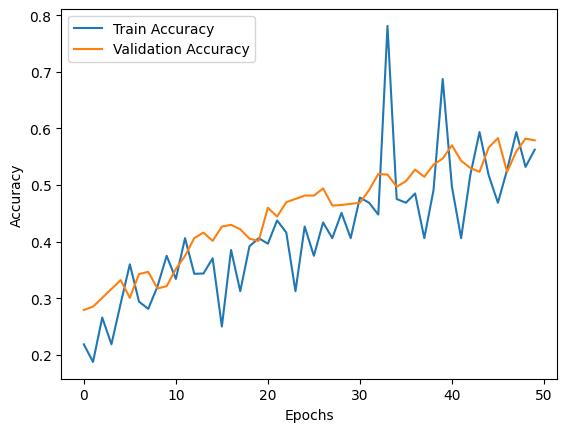

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**8️ Test Model on Unseen Data**

In [10]:
import tensorflow as tf

# Get the actual number of classes in the test set
num_classes_test = test_generator.num_classes
# Create a new model with the correct output layer
new_model = tf.keras.models.Sequential(model.layers[:-1])  # Copy all layers except the last one
new_model.add(tf.keras.layers.Dense(num_classes_test, activation='softmax'))  # Add a new output layer

# Compile the new model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the new model
test_loss, test_acc = new_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 893s 19s/step - accuracy: 0.0762 - loss: 2.6658
Test Accuracy: 12.93%


**9 Confusion Matrix**

48/48 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step


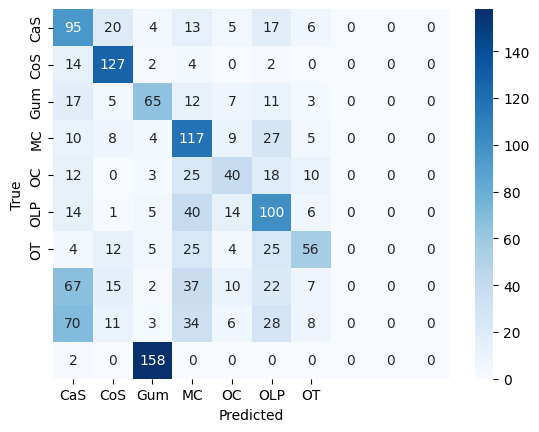

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Fine-Tune a Pretrained Model

We’ll use EfficientNetB0, freeze early layers, and train the last layers.

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


train_dir = "/content/drive/My Drive/Computer_Vision_intern/Teeth_Dataset/Training"
val_dir = "/content/drive/My Drive/Computer_Vision_intern/Teeth_Dataset/Validation"
test_dir = "/content/drive/My Drive/Computer_Vision_intern/Teeth_Dataset/Testing"


# Image parameters
img_size = (256, 256)
batch_size = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)


Found 3097 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


# Build & Train the Model

In [1]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(256, 256), batch_size=32, class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(256, 256), batch_size=32, class_mode="categorical"
)

# Load Pretrained Model (EfficientNetB0)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

# Unfreeze last 50 layers for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(7, activation="softmax")(x)

# Compile Model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[lr_scheduler])


NameError: name 'train_dir' is not defined

# **Step 7: Save the Model**


**9 Save Model**

In [16]:
model.save("/content/drive/My Drive/Computer_Vision_intern/teeth_classification_model.h5")


# **Thanks**